# In Class Notebook, Week 08

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_AOUAOG_fall2021/blob/master/week08/inClass_week08.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

First, import our usual things:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import bqplot
import pandas as pd
# new one:
import geopandas

## Quick look at bqplot maps

In [2]:
bqplot.Map?

In [4]:
# 1. data (data & axis are meshed together)
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. scales -- projection
sc_geo = bqplot.Mercator() # we already know this is not a great projection!

# 3. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# no interactions!

# put it all together
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [5]:
# 1. data (data & axis are meshed together)
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. scales -- projection
sc_geo = bqplot.Gnomonic() # we already know this is not a great projection!

# 3. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# no interactions!

# put it all together
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

Above were world maps, we can also zoom into the US:

In [7]:
# 1. data (data & axis are meshed together)
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales -- projection
sc_geo = bqplot.AlbersUSA() # we already know this is not a great projection!

# 3. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# no interactions!

# put it all together
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

There is some interactivity available in bqplot:

In [9]:
# 1. data (data & axis are meshed together)
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales -- projection
sc_geo = bqplot.AlbersUSA() # we already know this is not a great projection!

# 3. Marks
tt = bqplot.Tooltip(fields=['id','name'])
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo}, tooltip=tt)

# Add in tooltip
shape_map.interactions = {'click':'select', 'hover':'tooltip'}

# put it all together
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [10]:
# this command on Windows would be dir not ls
# also, probably in a different location
!ls /Users/jillnaiman/opt/anaconda3/pkgs/bqplot-0.12.2-py_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Focus on Geopandas

In [11]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

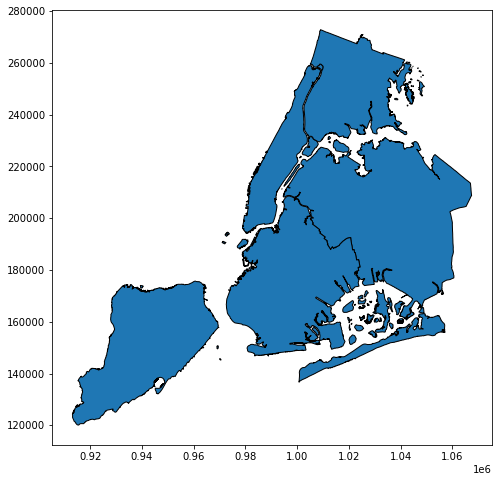

In [14]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
df.plot(figsize=(8,8), edgecolor='k')

In [15]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [16]:
gdf_councils

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.827758e+08,209845.933925,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.007085e+08,145404.494177,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [17]:
gdf_councils.describe()

,OBJECTID_1,ShapeSTArea,ShapeSTLength
count,5.000000,5.000000e+00,5.000000
mean,813.000000,1.296012e+08,115655.550794
std,1.581139,6.131525e+07,61471.695860
min,811.000000,5.164512e+07,62243.277115
25%,812.000000,1.049800e+08,77363.320814
50%,813.000000,1.078965e+08,83420.727939
75%,814.000000,1.827758e+08,145404.494177
max,815.000000,2.007085e+08,209845.933925


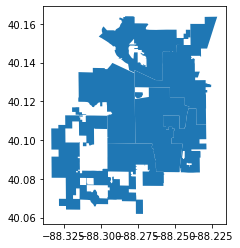

In [18]:
gdf_councils.plot()

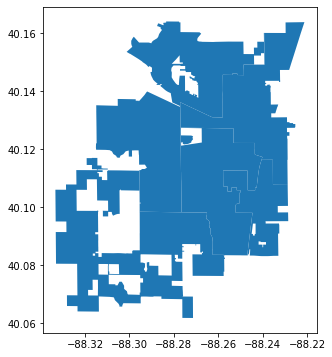

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
gdf_councils.plot(ax=ax)
plt.show()

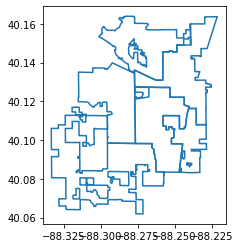

In [20]:
gdf_councils.boundary.plot()

In [21]:
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


In [22]:
gdf_councils.centroid

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-88.29998 40.08731)
1    POINT (-88.28231 40.13389)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [23]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

In [27]:
gdf_props.head()

,OBJECTID,COMMENTS,CB,DEPT,PIN,ACREAGE,CODE_TYPE,DESCRIPTION,TYPE,DEPT_ABBR,DESCRIP_ADDR,FUTURE,PA,ZONING,ShapeSTArea,ShapeSTLength,geometry
0,1,,,PWD,412001326010,0.755*,A,Drainage/Boneyard,Boneyard Channel,PWD,Boneyard Channel,Flood Hazard Area,101.0,MHP,32930.497803,897.925620,"POLYGON ((-88.25043 40.13085, -88.25044 40.130..."
1,2,,None,NSD,422012226003,4.432*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,1930.800537,272.145439,"POLYGON ((-88.24300 40.12699, -88.24300 40.127..."
2,3,,None,NSD,422012226004,0.181*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,7915.196533,372.150616,"POLYGON ((-88.24300 40.12681, -88.24300 40.126..."
3,4,,None,NSD,422012226005,0.186*,D,City Redevelopment,Beardsley Park Plan,NSD,1108 N Neil,Neighborhood Plan,1.0,SF 1,8104.292847,377.890980,"POLYGON ((-88.24344 40.12663, -88.24300 40.126..."
4,5,,None,NSD,422012226006,0.185*,D,City Redevelopment,Beardsley Park Plan,NSD,1106 N Neil,Neighborhood Plan,1.0,SF 1,8088.671143,377.710096,"POLYGON ((-88.24344 40.12645, -88.24299 40.126..."


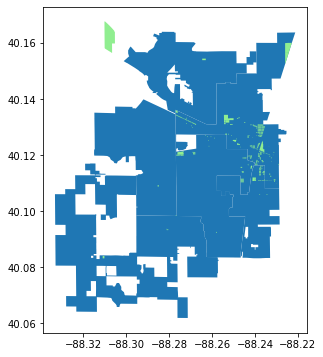

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
gdf_councils.plot(ax=ax)
gdf_props.plot(ax=ax, color='lightgreen')
plt.show()

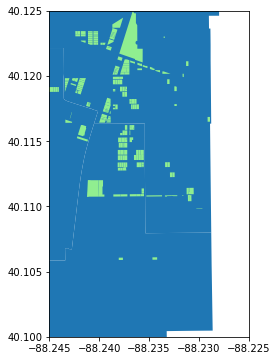

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
gdf_councils.plot(ax=ax)
gdf_props.plot(ax=ax, color='lightgreen')
# on campus zoom-in!
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
plt.show()

## Other public data sources -- US Census

In [31]:
gdf_states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip')

In [33]:
#gdf_states.head()

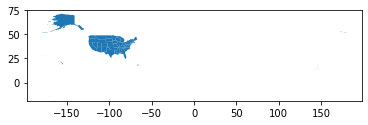

In [34]:
gdf_states.plot()

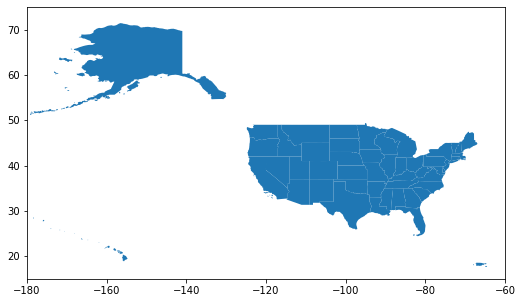

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
gdf_states.plot(ax=ax)
ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

In [36]:
gdf_na = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2021/AIANNH/tl_2021_us_aiannh.zip')

In [37]:
gdf_na.head()

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D2,R,F,G2101,A,2457042,123,+41.4858024,-072.0902766,"MULTIPOLYGON (((-72.08306 41.49763, -72.08284 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D8,R,F,G2101,A,371387,0,+36.9850490,-119.6396814,"POLYGON ((-119.64082 36.98500, -119.64058 36.9..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89736 40.15100, -120.89733 40.1..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467058,316267874,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."


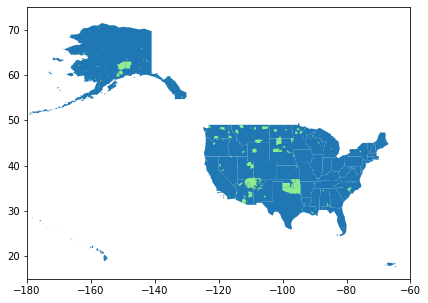

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
gdf_states.plot(ax=ax)
gdf_na.plot(ax=ax, color='lightgreen')
ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

In [40]:
gdf_na['NAMELSAD'].unique()

array(['Mohegan Reservation',
       'Golden Hill Paugussett (state) Reservation',
       'Table Mountain Rancheria', 'Greenville Rancheria',
       'Flathead Reservation', 'Bishop Reservation',
       'Fallon Paiute-Shoshone Reservation', 'Walker River Reservation',
       'Los Coyotes Reservation', 'Manzanita Reservation',
       'Mesa Grande Reservation', 'Pala Reservation',
       'Isabella Reservation', 'Mattaponi (state) Reservation',
       'Roaring Creek Rancheria', 'Pueblo of Pojoaque',
       'Rosebud Indian Reservation', 'Woodfords Community',
       'Spokane Reservation', 'Chitimacha Reservation',
       'Coos, Lower Umpqua, and Siuslaw Reservation',
       'Pascua Pueblo Yaqui Reservation', 'Berry Creek Rancheria',
       'Enterprise Rancheria', 'Shakopee Mdewakanton Sioux Community',
       'Santa Rosa Rancheria', "L'Anse Reservation",
       'Paucatuck Eastern Pequot (state) Reservation',
       'Mississippi Choctaw Reservation', 'Duck Valley Reservation',
       'Southe

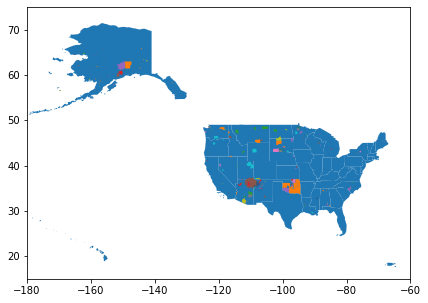

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
gdf_states.plot(ax=ax)
gdf_na.plot(column='NAMELSAD', ax=ax)
ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

## Geopandas + Contextily 
(background maps)

In [42]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


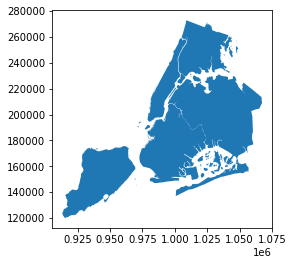

In [43]:
gdf.plot()

In [44]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [45]:
gdf = gdf.to_crs(epsg=4326)

In [46]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

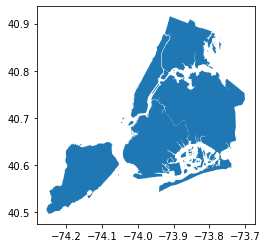

In [47]:
gdf.plot()

In [48]:
import contextily as ctx

In [49]:
gdf = gdf.to_crs(epsg=3857)

In [51]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

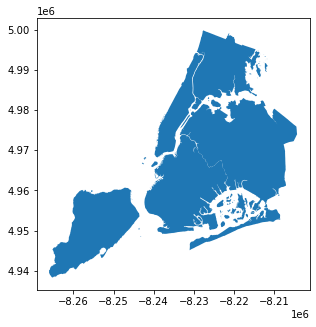

In [52]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
gdf.plot(ax=ax)
plt.show()

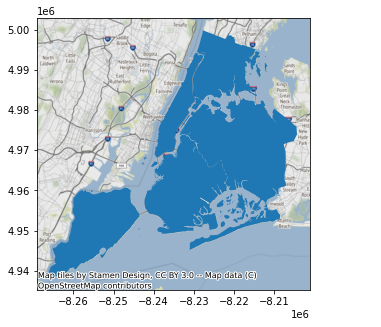

In [53]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
gdf.plot(ax=ax)
ctx.add_basemap(ax=ax)
plt.show()

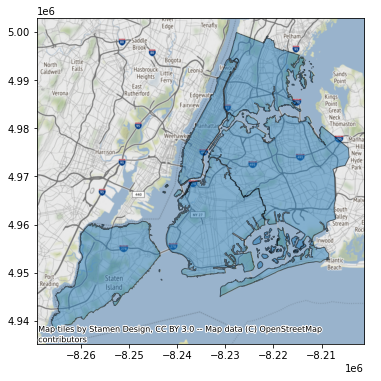

In [56]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
gdf.plot(ax=ax, alpha=0.5,edgecolor='k')
ctx.add_basemap(ax=ax)
plt.show()

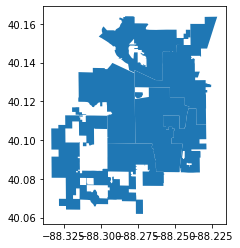

In [57]:
gdf_councils.plot()

In [58]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
gdf_councils = gdf_councils.to_crs(epsg=3857)

In [60]:
gdf_councils.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

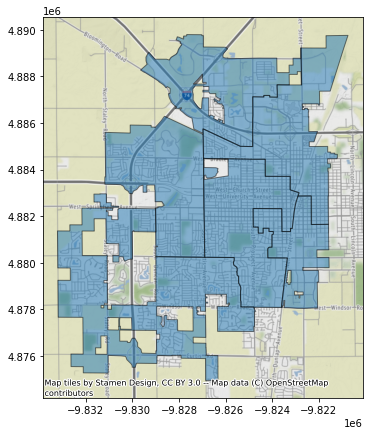

In [61]:
fig, ax = plt.subplots(figsize=(9,7))
gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)
plt.show()

In [62]:
gdf_councils = gdf_councils.to_crs(epsg=4326)

In [63]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

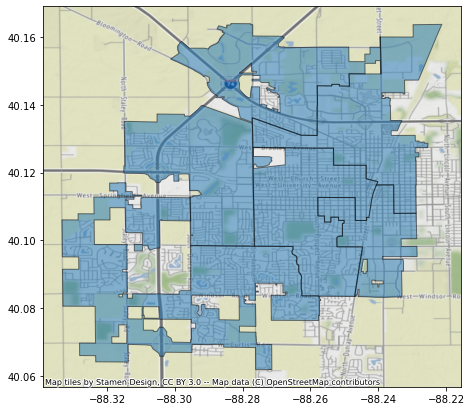

In [64]:
fig, ax = plt.subplots(figsize=(9,7))
gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs) # gdf_councils.crs.to_string()
plt.show()

In [65]:
gdf_apt = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')

In [68]:
gdf_apt.head()

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19657.997437,929.167804,None,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19735.512329,950.194217,None,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13970.178833,678.398035,None,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19739.423340,941.358477,None,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13065.121582,636.744457,None,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."


In [70]:
gdf_apt['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None, 'Other'],
      dtype=object)

In [73]:
# mask out and replace the None's with "Not specified"
gdf_apt.loc[gdf_apt['Building_Type'].isnull(),'Building_Type'] = 'Not specified'
# gdf_apt['Building_Type'].isnull() is our boolean operation

In [72]:
gdf_apt['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', 'Not specified',
       'Other'], dtype=object)

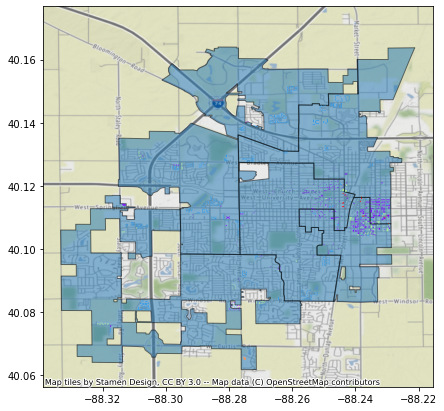

In [75]:
fig, ax = plt.subplots(figsize=(9,7))
# city council districts map
gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
# apts layer map
gdf_apt.plot(column='Building_Type',ax=ax, cmap='rainbow')

# adding a basemap
ctx.add_basemap(ax=ax, crs=gdf_councils.crs) # gdf_councils.crs.to_string()
plt.show()

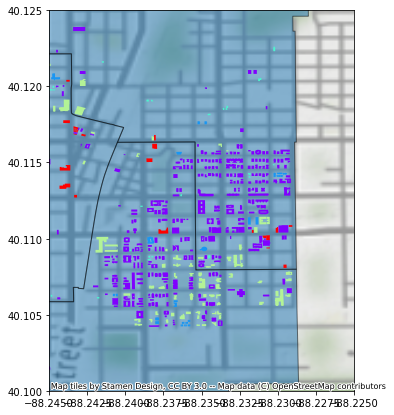

In [76]:
fig, ax = plt.subplots(figsize=(9,7))
# city council districts map
gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
# apts layer map
gdf_apt.plot(column='Building_Type',ax=ax, cmap='rainbow')
# adding a basemap
ctx.add_basemap(ax=ax, crs=gdf_councils.crs) # gdf_councils.crs.to_string()

# zoom into campustown
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)

plt.show()

We note that our basemap is a little fuzzy, this is because of the default resolution from our un-zoomed axis.

Redo with a reorder of the zoom:

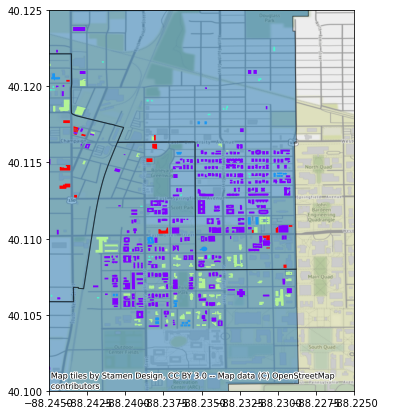

In [77]:
fig, ax = plt.subplots(figsize=(9,7))
# city council districts map
gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
# apts layer map
gdf_apt.plot(column='Building_Type',ax=ax, cmap='rainbow')
# zoom into campustown
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)

# adding a basemap
ctx.add_basemap(ax=ax, crs=gdf_councils.crs) # gdf_councils.crs.to_string()

plt.show()

In [78]:
gdf_apt.plot?

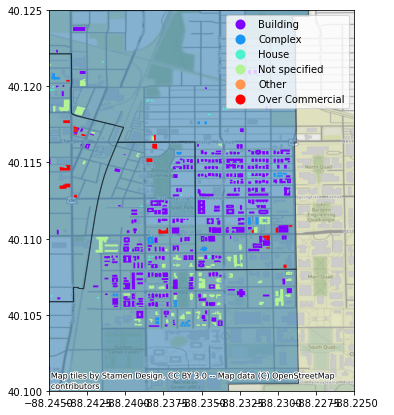

In [79]:
fig, ax = plt.subplots(figsize=(9,7))
# city council districts map
gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
# apts layer map
gdf_apt.plot(column='Building_Type',ax=ax, cmap='rainbow', categorical=True, legend=True)
# zoom into campustown
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)

# adding a basemap
ctx.add_basemap(ax=ax, crs=gdf_councils.crs) # gdf_councils.crs.to_string()

plt.show()

## Geopandas + contextily + ipywidgets

In [80]:
import ipywidgets

Build up a .interact decorator call, by first "hard-coding" our selection of apartment building type.

In [82]:
btype = 'Building'

gdf_apt.loc[gdf_apt['Building_Type']==btype]

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
20,21,410 E Green St,462118129026 & 462118129027,64,5,20.0,410 E Green St,,None,Building,...,None,None,None,None,None,Yes,15958.883057,507.147218,None,"POLYGON ((-88.23259 40.11039, -88.23218 40.110..."
21,22,408 E Green St,462118129017,28,3,21.0,408 E Green St,,AI08-0013,Building,...,,,None,None,None,Yes,8914.532959,539.800411,None,"POLYGON ((-88.23259 40.11039, -88.23260 40.110..."
22,23,406 E Green St,462118129017,9,2,22.0,406 E Green St,,AI08-0013,Building,...,,,None,None,None,Yes,2434.252197,215.323497,None,"POLYGON ((-88.23284 40.11054, -88.23297 40.110..."
96,97,1114 Broadmoor Dr,452023257004,4,1,112.0,1114 Broadmoor Dr,,AI09-0018,Building,...,,,None,None,None,None,2008.372314,187.683177,None,"POLYGON ((-88.26361 40.09367, -88.26373 40.093..."
97,98,1201 Broadmoor Dr,452023256021,2,1,113.0,1201 Broadmoor Dr,Broadmoor Drive Apartments,None,Building,...,None,None,None,None,None,None,3677.721069,413.708046,None,"POLYGON ((-88.26447 40.09370, -88.26447 40.093..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,3668,213 W Green St,432013208001 thru -003,34,3,NaN,213 W Green St,None,None,Building,...,None,None,None,None,None,None,9550.097900,564.342790,None,"POLYGON ((-88.24661 40.11001, -88.24661 40.109..."
2306,3669,201 W Green St,"432013208011,-022 thru -023",48,3,NaN,201 W Green St,None,None,Building,...,None,None,None,None,None,None,11212.774780,619.328109,None,"POLYGON ((-88.24531 40.10988, -88.24531 40.110..."
2307,3670,3102 Palmer Dr,462029427004,30,3,NaN,None,None,None,Building,...,None,None,None,None,None,None,15342.864868,769.274078,None,"POLYGON ((-88.31770 40.07527, -88.31747 40.075..."
2315,4071,210 S Fourth St,462107377002 thru -004,77,7,NaN,None,None,None,Building,...,None,None,None,None,None,None,16389.222778,846.476530,None,"POLYGON ((-88.23274 40.11487, -88.23278 40.114..."


Make a plot with the hard-coded selection:

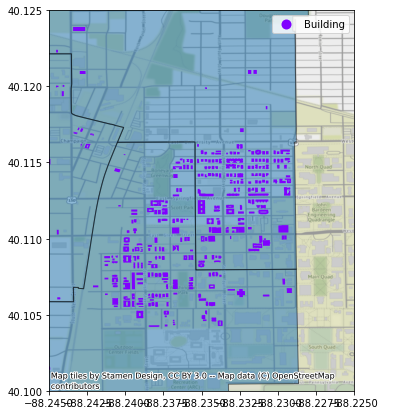

In [85]:
btype = 'Building'

gdf_apt_subset = gdf_apt.loc[gdf_apt['Building_Type']==btype]

# plot with the subset
fig, ax = plt.subplots(figsize=(9,7))
gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_apt_subset.plot(column='Building_Type',ax=ax, cmap='rainbow', categorical=True, legend=True)
# zoom in
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
# basemap
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
plt.show()

In [86]:
#btype = 'Building'

def my_geo_plot(btype):
    gdf_apt_subset = gdf_apt.loc[gdf_apt['Building_Type']==btype]

    # plot with the subset
    fig, ax = plt.subplots(figsize=(9,7))
    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_apt_subset.plot(column='Building_Type',ax=ax, cmap='rainbow', categorical=True, legend=True)
    # zoom in
    ax.set_xlim(-88.245,-88.225)
    ax.set_ylim(40.10,40.125)
    # basemap
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
    plt.show()

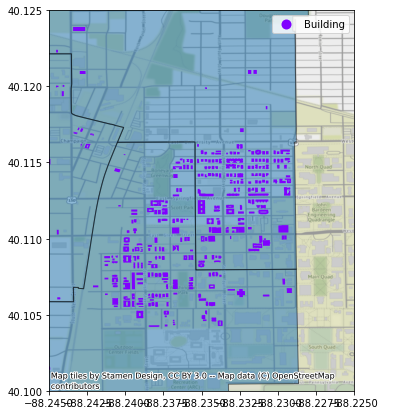

In [87]:
my_geo_plot('Building')

In [ ]:
my_geo_plot('Complex')